En primer lugar realizamos una simulación larga a T=1 para determinar el tiempo de decorrelación. 

In [5]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.animation as animation

In [37]:
#grafico de C_t
#grafico de termalizacion
#comparar tau con tiempo de termalizacion

El tiempo de decorrelación es de alrededor de 10000 pasos, en todo lo que sigue los valores de fueron tomados cada 10000 pasos.

In [75]:
Ts = [round(i,2) for i in np.arange(4,0.4,-0.1)]
betas = [1/i for i in Ts]
dfs = {str(i):pd.read_csv(f"outputs/out_{i}.dat") for i in Ts}

El output de una de las trayectorias tiene esta pinta:

In [16]:
dfs["0.8"]

,Paso,E_tot,E_med,E_sqr,M_tot,M_med,M_sqr,acept_ratio
0,10000,-1800.0,-1800.000000,3.240000e+06,900.0,900.000000,810000.000000,0.000000
1,20000,-1800.0,-1799.953200,3.239832e+06,900.0,899.988300,809978.963400,0.000100
2,30000,-1800.0,-1799.968800,3.239888e+06,900.0,899.992200,809985.975600,0.000067
3,40000,-1800.0,-1799.976600,3.239916e+06,900.0,899.994150,809989.481700,0.000050
4,50000,-1800.0,-1799.907040,3.239666e+06,900.0,899.976760,809958.214480,0.000080
...,...,...,...,...,...,...,...,...
995,9960000,-1800.0,-1799.621937,3.238642e+06,900.0,899.904911,809829.043243,0.000099
996,9970000,-1800.0,-1799.621429,3.238640e+06,900.0,899.904785,809828.816161,0.000099
997,9980000,-1800.0,-1799.621808,3.238642e+06,900.0,899.904880,809828.987688,0.000099
998,9990000,-1800.0,-1799.622187,3.238643e+06,900.0,899.904976,809829.158871,0.000099


**1.** Presentar gráficos de las siguientes cantidades como función de la temperatura:
    
    a) Magnetización media ⟨M(T, B = 0)⟩
    
    b) Energía media ⟨E⟩
    
    c) Fracción de pasos aceptados respecto de pasos totales de MC.

In [107]:
M_meds = [dfs[i]["M_med"][999] for i in dfs.keys()]
E_meds = [dfs[i]["E_med"][999] for i in dfs.keys()]
acc_fraq = [dfs[i]["acept_ratio"][999] for i in dfs.keys()]

E_vars = [(dfs[i]["E_sqr"][999]-dfs[i]["E_med"][999]**2) for i in dfs.keys()]
M_vars = [(dfs[i]["M_sqr"][999]-dfs[i]["M_med"][999]**2) for i in dfs.keys()]

Cvs = [(betas[i]**2/(30*30))*E_vars[i] for i in range(len(Ts))]
Chis = [betas[i]*M_vars[i] for i in range(len(Ts))]


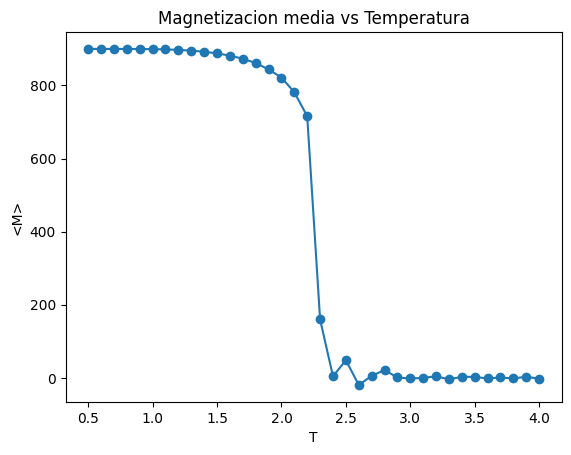

In [105]:
plt.plot(Ts,M_meds)
plt.scatter(x=Ts,y=M_meds)
plt.xlabel("T")
plt.ylabel("<M>")
plt.title("Magnetizacion media vs Temperatura")
plt.show()

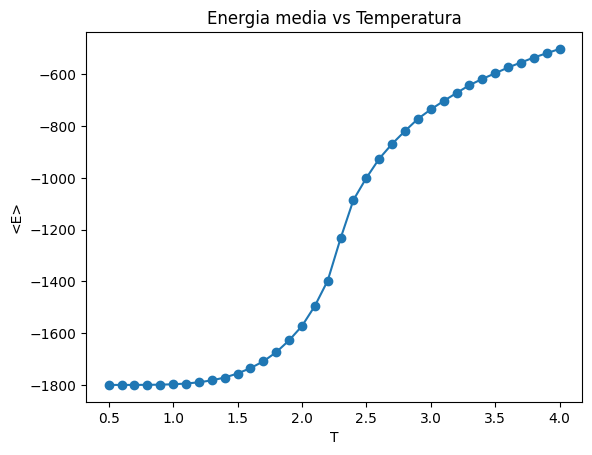

In [36]:
plt.plot(Ts,E_meds)
plt.scatter(x=Ts,y=E_meds)
plt.xlabel("T")
plt.ylabel("<E>")
plt.title("Energia media vs Temperatura")
plt.show()

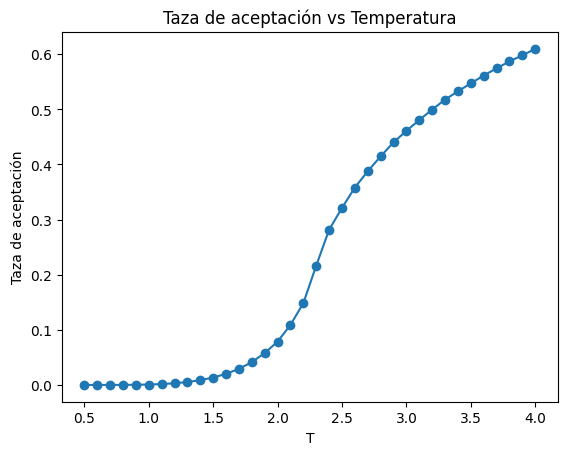

In [38]:
plt.plot(Ts,acc_fraq)
plt.scatter(x=Ts,y=acc_fraq)
plt.xlabel("T")
plt.ylabel("Taza de aceptación")
plt.title("Taza de aceptación vs Temperatura")
plt.show()

**2.** Presentar histogramas de ⟨E⟩ y ⟨M⟩ para las configuraciones obtenidas con la simulación de Monte Carlo para distintas temperaturas

Vamos a evaluar las distribuciones de E y M para temperaturas extremas (T = 3.9 y 0.7) y temperaturas cercanas a la crítica (T = 2.4, 2.3, 2.2 y 2.1)

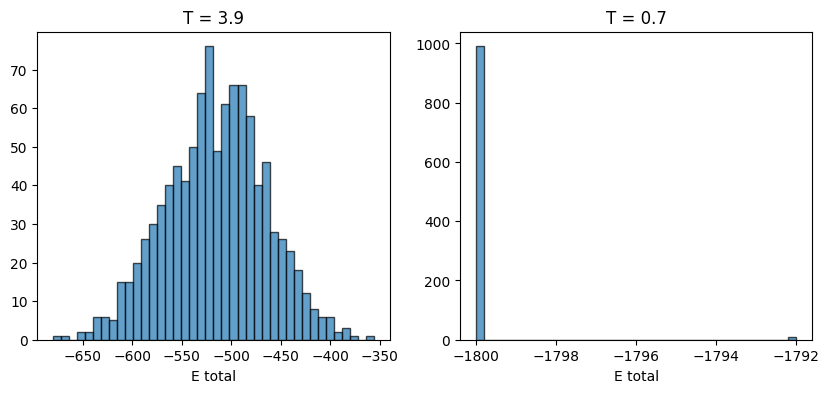

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
axs[0].hist(dfs["3.9"]["E_tot"], bins = 40, alpha = 0.7, edgecolor="black")
axs[0].set_title("T = 3.9")
axs[0].set_xlabel("E total")

axs[1].hist(dfs["0.7"]["E_tot"], bins = 40, alpha = 0.7, edgecolor="black")
axs[1].set_title("T = 0.7")
axs[1].set_xlabel("E total")

plt.show()

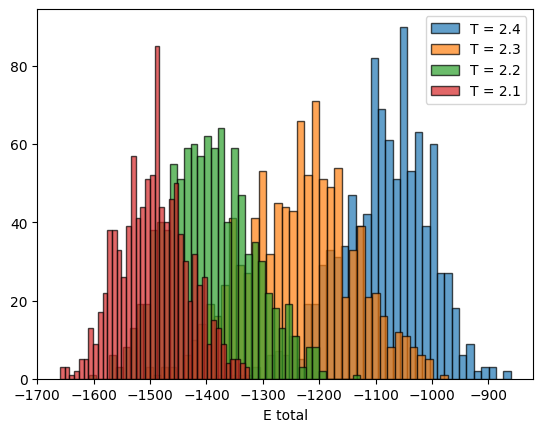

In [61]:
plt.hist(dfs["2.4"]["E_tot"], bins = 40, alpha = 0.7, edgecolor="black", label = "T = 2.4")
plt.hist(dfs["2.3"]["E_tot"], bins = 40, alpha = 0.7, edgecolor="black", label = "T = 2.3")
plt.hist(dfs["2.2"]["E_tot"], bins = 40, alpha = 0.7, edgecolor="black", label = "T = 2.2")
plt.hist(dfs["2.1"]["E_tot"], bins = 40, alpha = 0.7, edgecolor="black", label = "T = 2.1")
plt.legend()
plt.xlabel("E total")
plt.show()

Text(0.5, 0, 'M total')

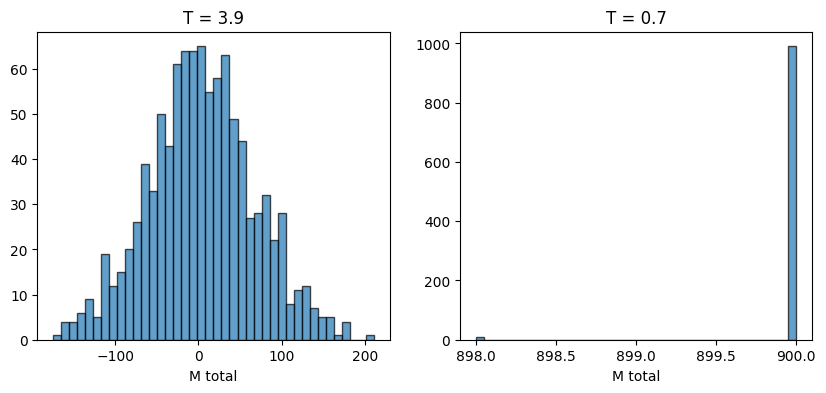

In [62]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
axs[0].hist(dfs["3.9"]["M_tot"], bins = 40, alpha = 0.7, edgecolor="black")
axs[0].set_title("T = 3.9")
axs[0].set_xlabel("M total")

axs[1].hist(dfs["0.7"]["M_tot"], bins = 40, alpha = 0.7, edgecolor="black")
axs[1].set_title("T = 0.7")
axs[1].set_xlabel("M total")

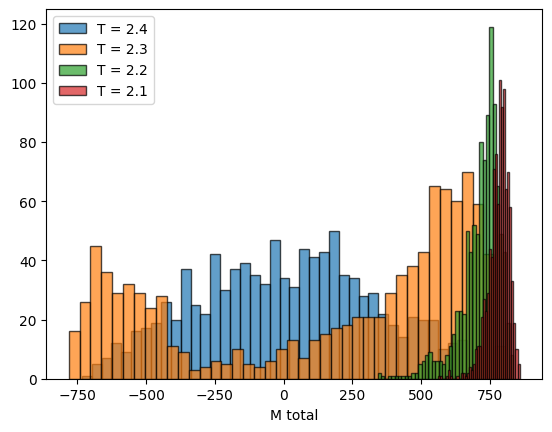

In [63]:
plt.hist(dfs["2.4"]["M_tot"], bins = 40, alpha = 0.7, edgecolor="black", label = "T = 2.4")
plt.hist(dfs["2.3"]["M_tot"], bins = 40, alpha = 0.7, edgecolor="black", label = "T = 2.3")
plt.hist(dfs["2.2"]["M_tot"], bins = 40, alpha = 0.7, edgecolor="black", label = "T = 2.2")
plt.hist(dfs["2.1"]["M_tot"], bins = 40, alpha = 0.7, edgecolor="black", label = "T = 2.1")
plt.legend()
plt.xlabel("M total")
plt.show()

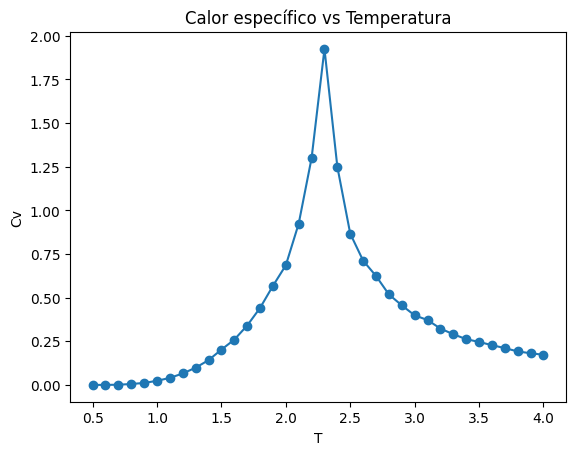

In [88]:
plt.plot(Ts,Cvs)
plt.scatter(x=Ts,y=Cvs)
plt.xlabel("T")
plt.ylabel("Cv")
plt.title("Calor específico vs Temperatura")
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_8864/1154973183.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel("$\chi$")


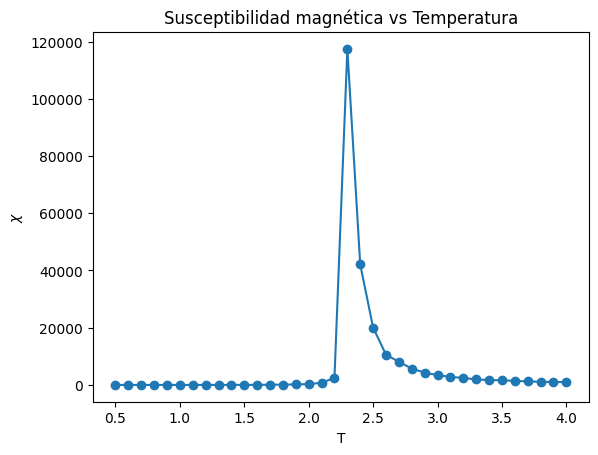

In [91]:
plt.plot(Ts,Chis)
plt.scatter(x=Ts,y=Chis)
plt.xlabel("T")
plt.ylabel("$\chi$")
plt.title("Susceptibilidad magnética vs Temperatura")
plt.show()